In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm # for choosing colormap for 3D plot

In [2]:
mesh_x, mesh_y = 50, 50
timesteps = 50
dx = 1.0 #  dx = dy
dt = 0.4
Diffusivity = 1.0

### Functions for initializing and applying boundary conditions

In [3]:
def initialize(c):
    c[mesh_x//2, mesh_y//2] = 1.0
    return
def apply_BC(c):
#    # Dirichlet (fixed) boundary condition
#     c[0, :] = 0.0
#     c[mesh_x-1, :] = 0.0
#     c[:, 0] = 0.0
#     c[:, mesh_y-1] = 0.0
#    # Neumann (zero-flux) boundary condition
    c[0, :] = c[1, :]
    c[mesh_x-1, :] = c[mesh_x-2, :]
    c[:, 0] = c[:, 1]
    c[:, mesh_y-1] = c[:, mesh_y-2]
    return

### implicit expression:
$$ \frac{\partial c}{\partial t} = D \left( \frac{\partial^2 c}{\partial x^2} + \frac{\partial^2 c}{\partial y^2} \right) $$

$$ -\alpha c_{i-1, j}^{t+1} -\alpha c_{i, j-1}^{t+1} + (1 + 4\alpha )c_{i, j}^{t+1} -\alpha c_{i+1, j}^{t+1} -\alpha c_{i, j+1}^{t+1} = c_{i, j}^t $$

In simpler terms,
$$ A_{xi} c_{i-1, j}^{t+1} + A_{yi} c_{i, j-1}^{t+1} + B_{i, j} c_{i, j}^{t+1} + C_{xi} c_{i+1, j}^{t+1} + C_{yi} c_{i, j+1}^{t+1} = D_{i, j} $$

In [4]:
# Initializing parameters
alpha = Diffusivity*dt/(dx**2)
c_jac = np.zeros( (mesh_x, mesh_y) )
A_x = np.zeros( (mesh_x, mesh_y) )
A_y = np.zeros( (mesh_x, mesh_y) )
C_x = np.zeros( (mesh_x, mesh_y) )
C_y = np.zeros( (mesh_x, mesh_y) )
B = np.zeros( (mesh_x, mesh_y) )
D = np.zeros( (mesh_x, mesh_y) )
total_iterations = 10
initialize(c_jac)
apply_BC(c_jac)
c_jac_new = np.copy(c_jac)

### Plotting initial composition profile

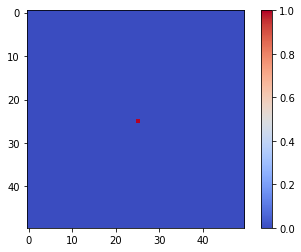

In [5]:
plt.imshow(c_jac, cmap=cm.coolwarm) # for plotting 2D projection with color as 3rd dimension
plt.colorbar()
plt.show()

### Jacobi solution

In [6]:
for t in range(timesteps):
    # update coefficients after each timestep
    A_x[1:mesh_x-1, 1:mesh_y-1] = -alpha
    A_y[1:mesh_x-1, 1:mesh_y-1] = -alpha
    C_x[1:mesh_x-1, 1:mesh_y-1] = -alpha
    C_y[1:mesh_x-1, 1:mesh_y-1] = -alpha
    B[1:mesh_x-1, 1:mesh_y-1] = 1+4*alpha
    D[1:mesh_x-1, 1:mesh_y-1] = c_jac[1:mesh_x-1, 1:mesh_y-1]
    
    for iterations in range(total_iterations*4):
        for i in range(1, mesh_x-1):
            for j in range(1, mesh_y-1):
                    c_jac_new[i,j] = (D[i,j] - A_x[i,j]*c_jac[i-1,j] - C_x[i,j]*c_jac[i+1,j] \
                                 - A_y[i,j]*c_jac[i,j-1] - C_y[i,j]*c_jac[i,j+1])/B[i,j]

        # update c_jac each iteration
        apply_BC(c_jac_new)
        c_jac = np.copy(c_jac_new)

### Plotting final composition profile

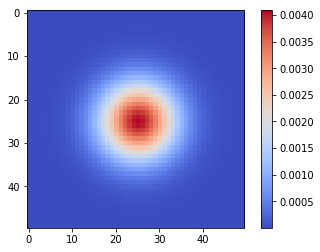

In [7]:
plt.imshow(c_jac, cmap=cm.coolwarm) # for plotting 2D projection with color as 3rd dimension
plt.colorbar()
plt.show()

### 3D plot of composition profile

<IPython.core.display.Javascript object>


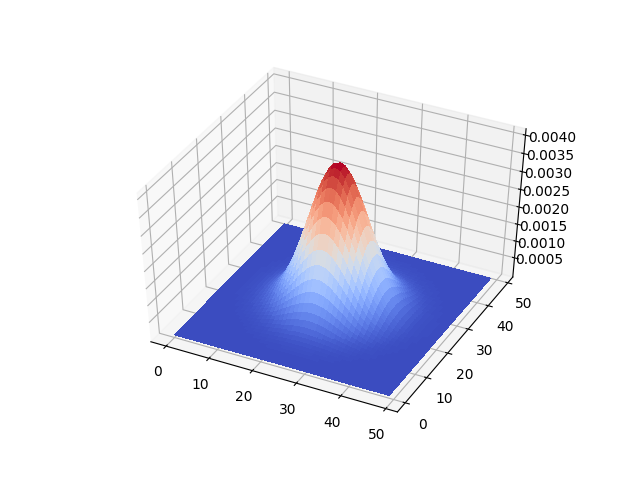

In [8]:
%matplotlib notebook
# 3D surface plot  
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(2) # creates a different window
ax = fig.gca(projection='3d') # adds a third axis
x_array = np.arange(0, mesh_x, dx)
y_array = np.arange(0, mesh_y, dx)
X, Y = np.meshgrid(y_array, x_array) # creates an xy grid of size mesh_x*mesh_y
surf = ax.plot_surface(X, Y, c_jac, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()